In [1]:
#necessary imports

import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
pwd()

'C:\\Users\\SAIRAM YERRAMSETTI\\Desktop\\KRISH NAIK\\FSDS\\prs\\Machine Learning'

In [3]:
data = pd.read_csv('Advertising.csv')

In [4]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
# finding relationship between the features and the response using scatterplots

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

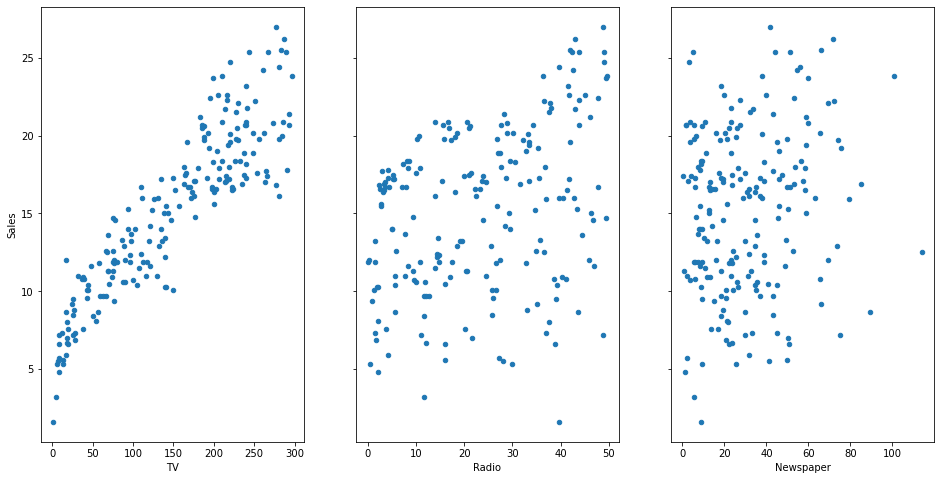

In [9]:
fig, axs = plt.subplots(1, 3, sharey=True )
data.plot(kind='scatter', x='TV',y='Sales',ax = axs[0], figsize=(16,8))
data.plot(kind='scatter', x='Radio',y='Sales',ax = axs[1])
data.plot(kind='scatter', x='Newspaper',y='Sales',ax = axs[2])

In [10]:
# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales


In [11]:
#follow the usual sklearn pattern:import, instantiate, fit

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)



LinearRegression()

In [12]:
#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)
print(lm.fit_intercept)

6.9748214882298925
[0.05546477]
True


In [13]:
# calculate the prediction:

6.9748214882298925 + 0.05546477*50


9.748059988229892

In [14]:
#let's create a data frame since the model expects it

X_new = pd.DataFrame({'TV':[50]})
X_new.head()

,TV
0,50


In [15]:
# make predictions for those x values and store them

preds = lm.predict(X_new)
preds

array([9.74806001])

### plotting the Least Square Lines


In [16]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [17]:
#make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([ 7.01364683, 23.41457946])

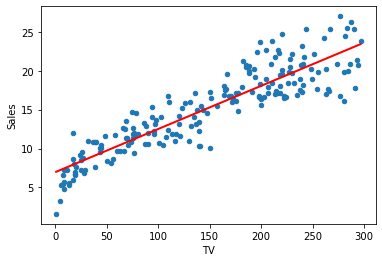

In [18]:
#first, plot the observed data

data.plot(kind='scatter', x='TV',y='Sales')
#then plot the least squares line
plt.plot(X_new, preds, c = 'red', linewidth=2)

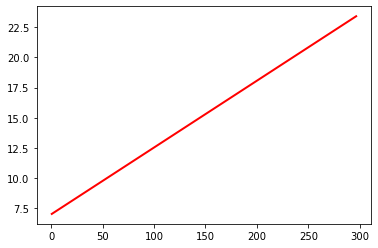

In [19]:
#then plot the least squares line
plt.plot(X_new, preds, c = 'red', linewidth=2)

In [20]:
#print the p-values for the model coefficients

In [21]:
## create x and y 
feature_cols = ['TV','Radio','Newspaper']
x = data[feature_cols]
y = data.Sales

lm = LinearRegression()
lm.fit(x,y)

# print the intercept and coefficients
print(lm.intercept_)
print(lm.coef_)


4.625124078808655
[0.05444578 0.10700123 0.00033566]


In [22]:
#statstical model: Ordinary least square model
import statsmodels.api as smf
model = smf.OLS(data['Sales'], data['TV'])
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              2714.
Date:                Mon, 24 Jan 2022   Prob (F-statistic):                   6.42e-118
Time:                        09:25:24   Log-Likelihood:                         -570.23
No. Observations:                 200   AIC:                                      1142.
Df Residuals:                     199   BIC:                                      1146.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0909      0.002     52.092      0.000       0.087       0.094
==============================================================================
Omnibus:                        9.476   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.081
Skew:                          -0.540   Prob(JB):                      0.00647
Kurtosis:                       2.792   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#add newspaper to the model (which we believe no association with sales)

lm = smf.OLS('Sales', exog = "TV + Radio + Newspaper")

ValueError: unrecognized data structures: <class 'str'> / <class 'str'>

In [24]:
import statsmodels.api as sm
import numpy as np
feature_cols = ['TV','Radio','Newspaper']
X = data[feature_cols]
y = data.Sales

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.params

const        4.625124
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64

In [25]:
#results.tvalues

In [26]:
print(results.rsquared)
results.rsquared_adj

0.9025912899684558


0.9011003403251159

In [27]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [28]:
# handling the categorical data

In [29]:
import numpy as np

# set a seed for reproductability
np.random.seed(123456)

# create a Series of booleans in which roughly half are true
nums = np.random.rand(len(data))
mask_large = nums > 0.5

#intially set size to small, then change roughly half to be large
data['Scale'] = 'small'
data.loc[mask_large, 'Scale'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Scale
0,230.1,37.8,69.2,22.1,small
1,44.5,39.3,45.1,10.4,large
2,17.2,45.9,69.3,12.0,small
3,151.5,41.3,58.5,16.5,large
4,180.8,10.8,58.4,17.9,small


In [30]:
#create a new series called Islarge

data['Islarge'] = data.Scale.map({'small' : 0, 'large' : 1})
data.head()

,TV,Radio,Newspaper,Sales,Scale,Islarge
0,230.1,37.8,69.2,22.1,small,0
1,44.5,39.3,45.1,10.4,large,1
2,17.2,45.9,69.3,12.0,small,0
3,151.5,41.3,58.5,16.5,large,1
4,180.8,10.8,58.4,17.9,small,0


lets redo the mlr problem and include the Islarge predictor.

In [31]:
#create X and y
feature_cols = ['TV','Radio','Newspaper','Islarge']

x = data[feature_cols]
y = data.Sales

#instantiate, fit
lm = LinearRegression()
lm.fit(x,y)

#print coefficients
i = 0
for col in feature_cols:
    print("The coefficient of ",col, ' is',lm.coef_[i])
    i = i+1



The coefficient of  TV  is 0.05452386294554406
The coefficient of  Radio  is 0.1070370578042589
The coefficient of  Newspaper  is 0.0006316030879331136
The coefficient of  Islarge  is 0.19316749437994823


# handling categoriacl variables with more than two categories

Let's create a new column called Targeted Geography and randomly assign obs to be rural, suburban, urban

In [32]:
#set a seed for reproductability
np.random.seed(123456)

#assign roughly one third of obs to each group

nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Targeted Geography'] = 'rural'
data.loc[mask_suburban, 'Targeted Geography'] = 'suburban'
data.loc[mask_urban, 'Targeted Geography'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Scale,Islarge,Targeted Geography
0,230.1,37.8,69.2,22.1,small,0,rural
1,44.5,39.3,45.1,10.4,large,1,urban
2,17.2,45.9,69.3,12.0,small,0,rural
3,151.5,41.3,58.5,16.5,large,1,urban
4,180.8,10.8,58.4,17.9,small,0,suburban


In [33]:
## create three dummy variable using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data['Targeted Geography'], prefix='Targeted Geography').iloc[:,1:]

#concatenate the dummy variable variable columns onto the original DataFrame
data = pd.concat([data, area_dummies],axis = 1)
data.head()

,TV,Radio,Newspaper,Sales,Scale,Islarge,Targeted Geography,Targeted Geography_suburban,Targeted Geography_urban
0,230.1,37.8,69.2,22.1,small,0,rural,0,0
1,44.5,39.3,45.1,10.4,large,1,urban,0,1
2,17.2,45.9,69.3,12.0,small,0,rural,0,0
3,151.5,41.3,58.5,16.5,large,1,urban,0,1
4,180.8,10.8,58.4,17.9,small,0,suburban,1,0


In [34]:
#create X and y
feature_cols = ['TV','Radio','Newspaper','Islarge','Targeted Geography_suburban','Targeted Geography_urban']

x = data[feature_cols]
y = data.Sales

#instantiate, fit
lm = LinearRegression()
lm.fit(x,y)

#print coefficients
i = 0
for col in feature_cols:
    print("The coefficient of ",col, ' is',lm.coef_[i])
    i = i+1



The coefficient of  TV  is 0.054582106471223524
The coefficient of  Radio  is 0.10806488238653698
The coefficient of  Newspaper  is 0.0008019502823917772
The coefficient of  Islarge  is 0.5443023296635954
The coefficient of  Targeted Geography_suburban  is -0.29530067757331774
The coefficient of  Targeted Geography_urban  is -0.5724568323017115


In [35]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [36]:
# lets create a function to create adjusted R-squared

def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [37]:
data = pd.read_csv('Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [38]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [39]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())

In [40]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [41]:
data = data.drop(columns = ['Serial No.'])

In [42]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


C:\Users\SAIRAM YERRAMSETTI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SAIRAM YERRAMSETTI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SAIRAM YERRAMSETTI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

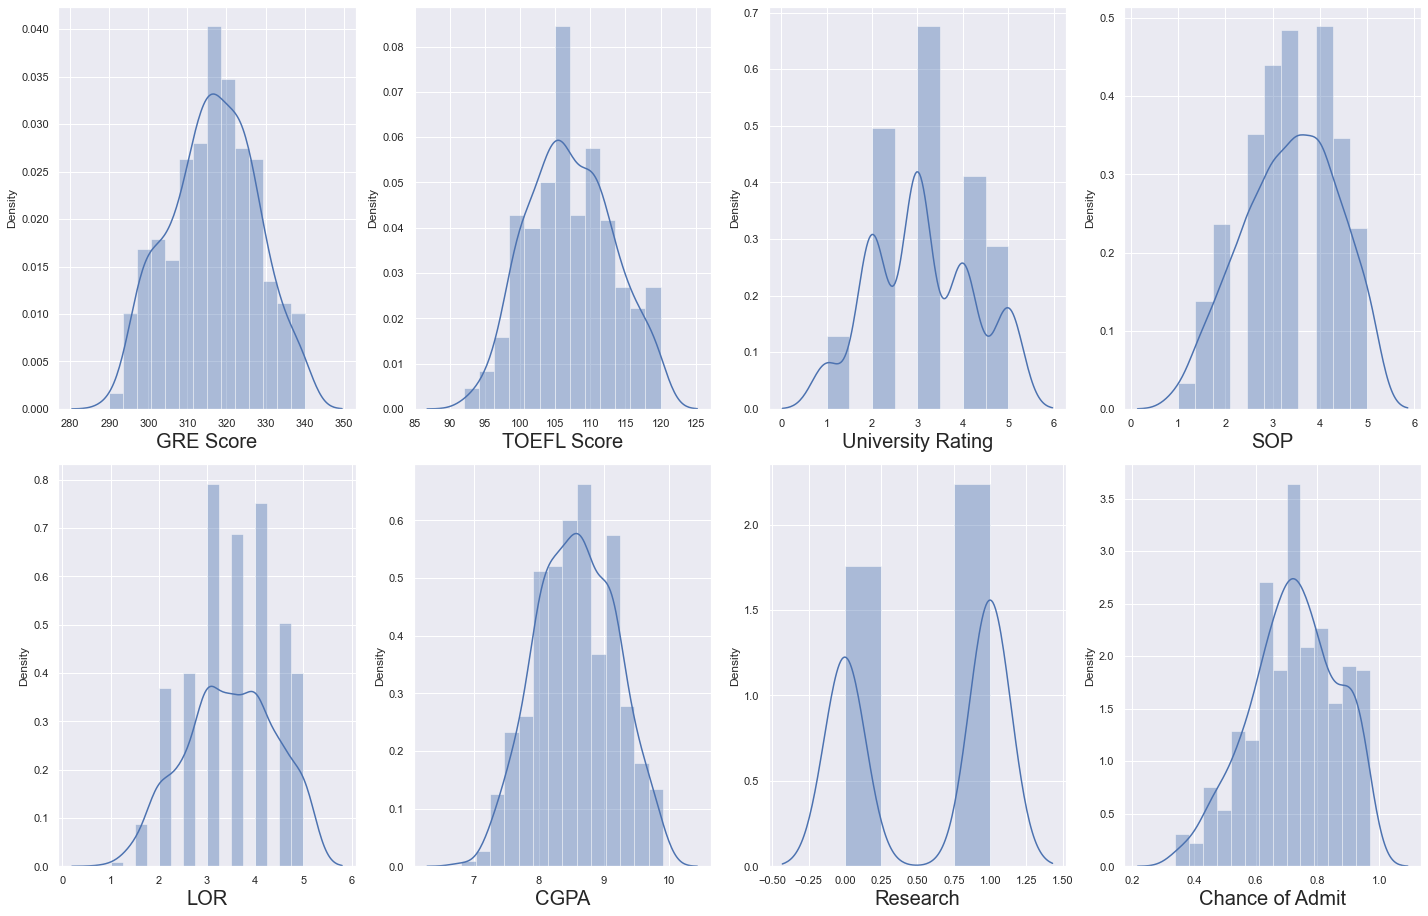

In [43]:
# lets see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor= 'white')
plotnumber = 1

for column in data:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [44]:
y = data['Chance of Admit']
X =data.drop(columns = ['Chance of Admit'])

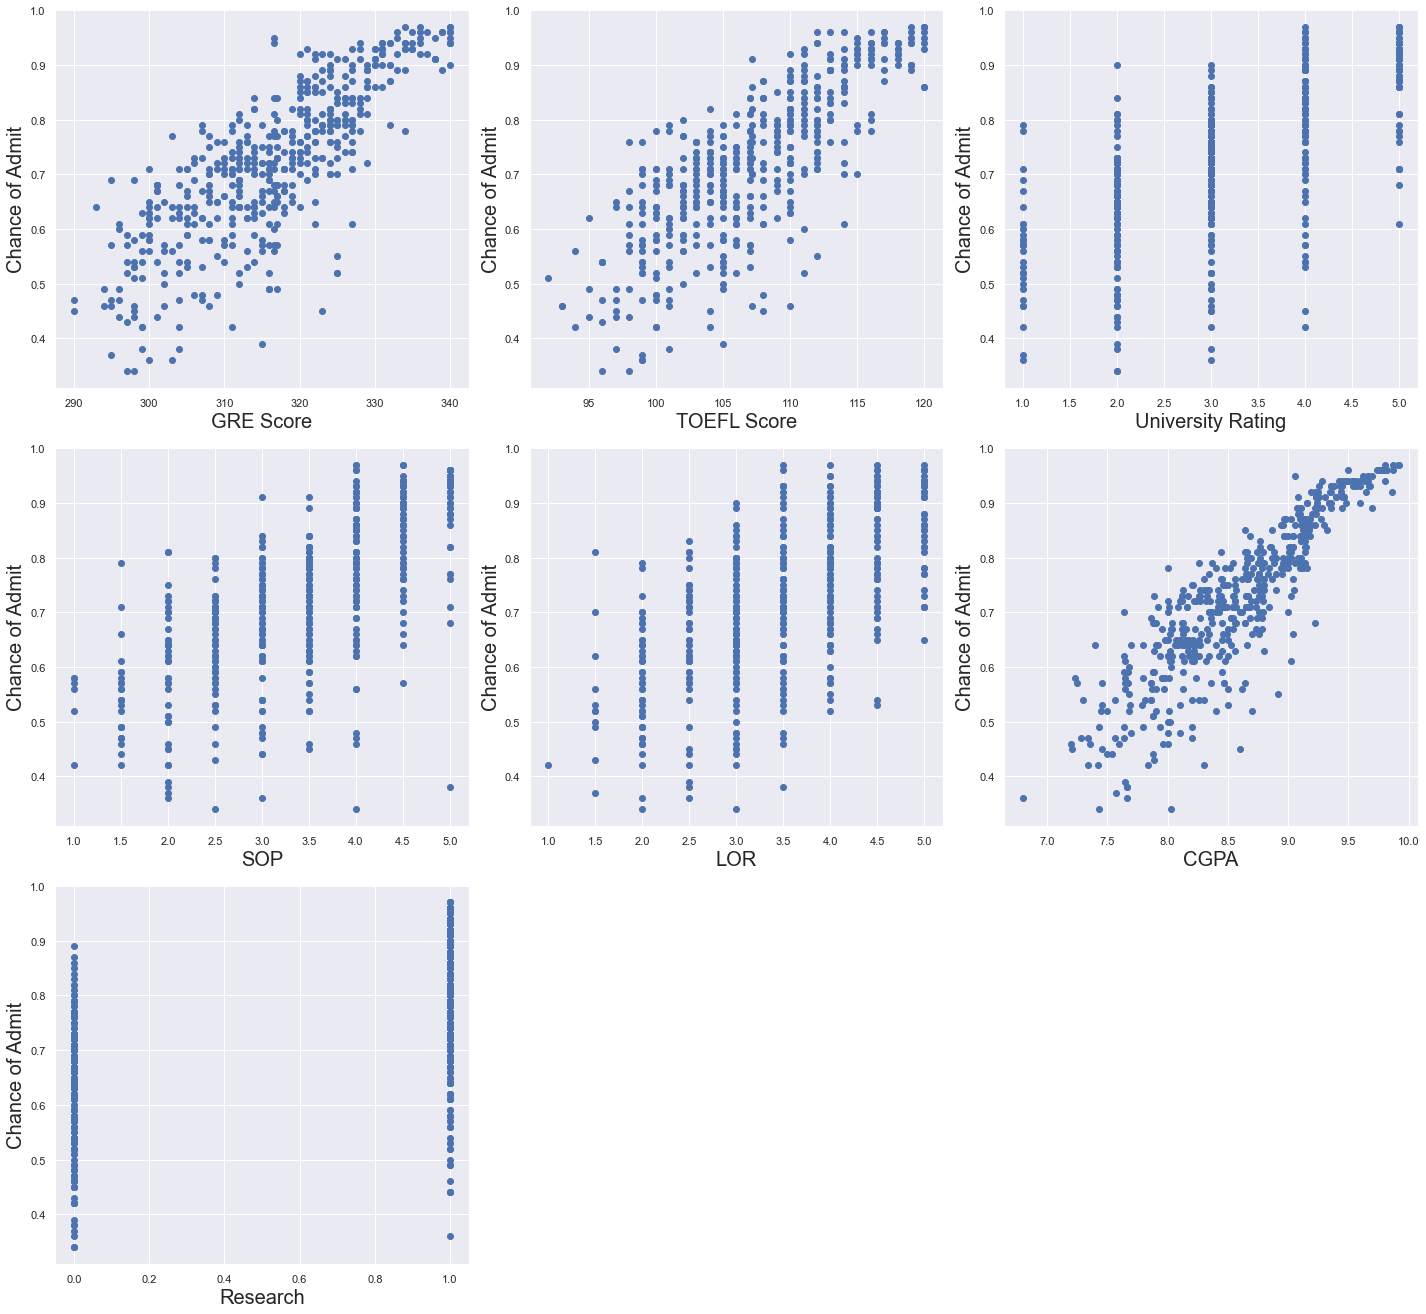

In [45]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [46]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [48]:
vif

,VIF,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


In [49]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [50]:
y_train

378    0.56
23     0.95
122    0.57
344    0.47
246    0.72
       ... 
51     0.56
291    0.56
346    0.47
130    0.96
254    0.85
Name: Chance of Admit, Length: 375, dtype: float64

In [51]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [52]:
regression.predict([[310,95,3,3,3,6,1]])

array([9.58474428])

In [53]:
#saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename,'wb'))

In [54]:
#prediction using the the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a = loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a

C:\Users\SAIRAM YERRAMSETTI\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.92190162])

In [55]:
regression.score(x_train,y_train)

0.8415250484247909

In [56]:
adj_r2(x_train,y_train)

0.8385023654247188

In [57]:
regression.score(x_test,y_test)

0.7534898831471066

In [58]:
adj_r2(x_test,y_test)

0.7387414146174464

In [59]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

C:\Users\SAIRAM YERRAMSETTI\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=10, max_iter=100000, normalize=True)

In [60]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

3.0341655445178153e-05

In [61]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=3.0341655445178153e-05)

In [62]:
lasso_reg.score(x_test, y_test)

0.7534654960492284

In [ ]:
#feature selection 